In [2]:
import random
import numpy as np 
import pandas as pd 
import seaborn as sns


In [3]:
import plotly.express as px

In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff


In [5]:

from scipy import stats
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import FixedFormatter, FixedLocator

In [6]:
prices_train = pd.read_csv("./NFLX.csv")
cm = sns.light_palette("green", as_cmap=True)
prices_train.head(30).style.background_gradient(cmap=cm)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [7]:
pd.DataFrame(prices_train.columns, columns=["name"])

,name
0,Date
1,Open
2,High
3,Low
4,Close
5,Adj Close
6,Volume


In [9]:
prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
prices_train.shape

(1009, 7)

In [11]:
fig = px.bar(prices_train, x='Date', y='Volume')
fig.update_layout(title=f'Netflix stock price', barmode='stack', font_color="black")
fig.show()

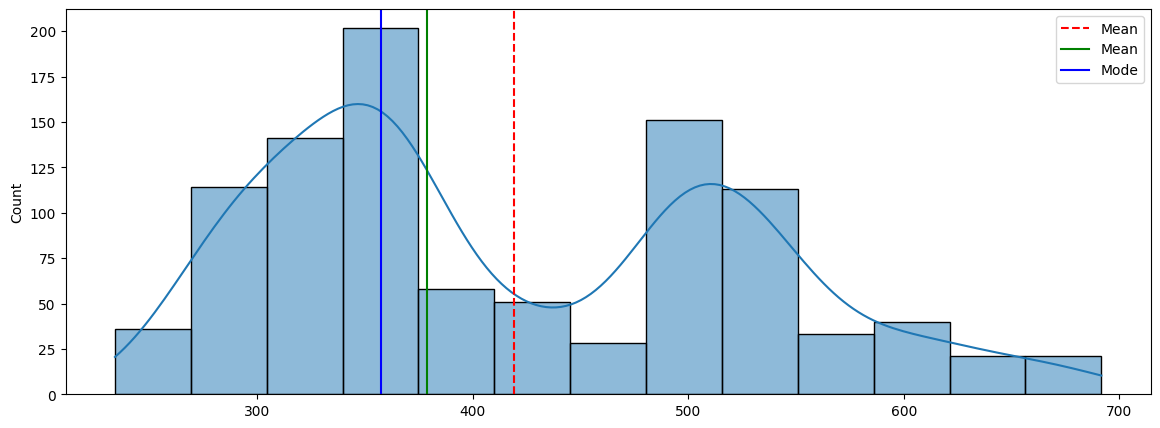

In [12]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = prices_train["Close"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=prices_train["Close"].mean()
median=prices_train["Close"].median()
mode=prices_train["Close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

In [13]:
prices_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(prices_train, test_size = 0.2)

In [18]:
test_pred = test.copy()
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
295,2019-04-09,360.540009,366.739990,359.000000,364.709991,364.709991,5439200
825,2021-05-17,485.589996,492.709991,482.809998,488.940002,488.940002,2705200
567,2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900
430,2019-10-21,272.890015,279.940002,269.000000,278.049988,278.049988,12599200
992,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
370,2019-07-26,328.790009,336.000000,327.500000,335.779999,335.779999,10847500
383,2019-08-14,308.010010,308.410004,298.010010,299.109985,299.109985,7355800
571,2020-05-13,435.690002,447.000000,427.269989,438.269989,438.269989,7014600
54,2018-04-24,319.220001,320.250000,302.309998,307.019989,307.019989,13893200
149,2018-09-07,342.200012,355.750000,341.250000,348.679993,348.679993,9105800


In [19]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
654,2020-09-10,503.350006,506.290009,478.839996,480.670013,480.670013,6240200
22,2018-03-08,322.200012,322.920013,314.130005,317.000000,317.000000,11340100
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
980,2021-12-27,615.000000,615.000000,609.250000,613.119995,613.119995,2061500
962,2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900
691,2020-11-02,478.869995,486.299988,475.000000,484.119995,484.119995,4408200
95,2018-06-21,421.380005,423.209991,406.369995,415.440002,415.440002,18389900
98,2018-06-26,393.279999,404.779999,389.049988,399.390015,399.390015,15191200
141,2018-08-27,367.149994,374.489990,360.000000,364.579987,364.579987,17427300
350,2019-06-27,363.200012,370.850006,363.200012,370.019989,370.019989,4138600


In [20]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [21]:
y_train = train['Close'].values
y_test = test['Close'].values

Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [24]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = model_lnr.predict(x_test)

In [26]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.47890785]


Model Evaluation

In [27]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 19.819
RMSE 4.452
MAE 3.054
MAPE 0.007
R2 Score :  0.998


Model Visualization

In [28]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    

    ax.spines['left'].set_color('white')        

    ax.spines['bottom'].set_color('white')      

    ax.set_facecolor("black")                   

In [31]:
viz = prices_train.copy()

In [35]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

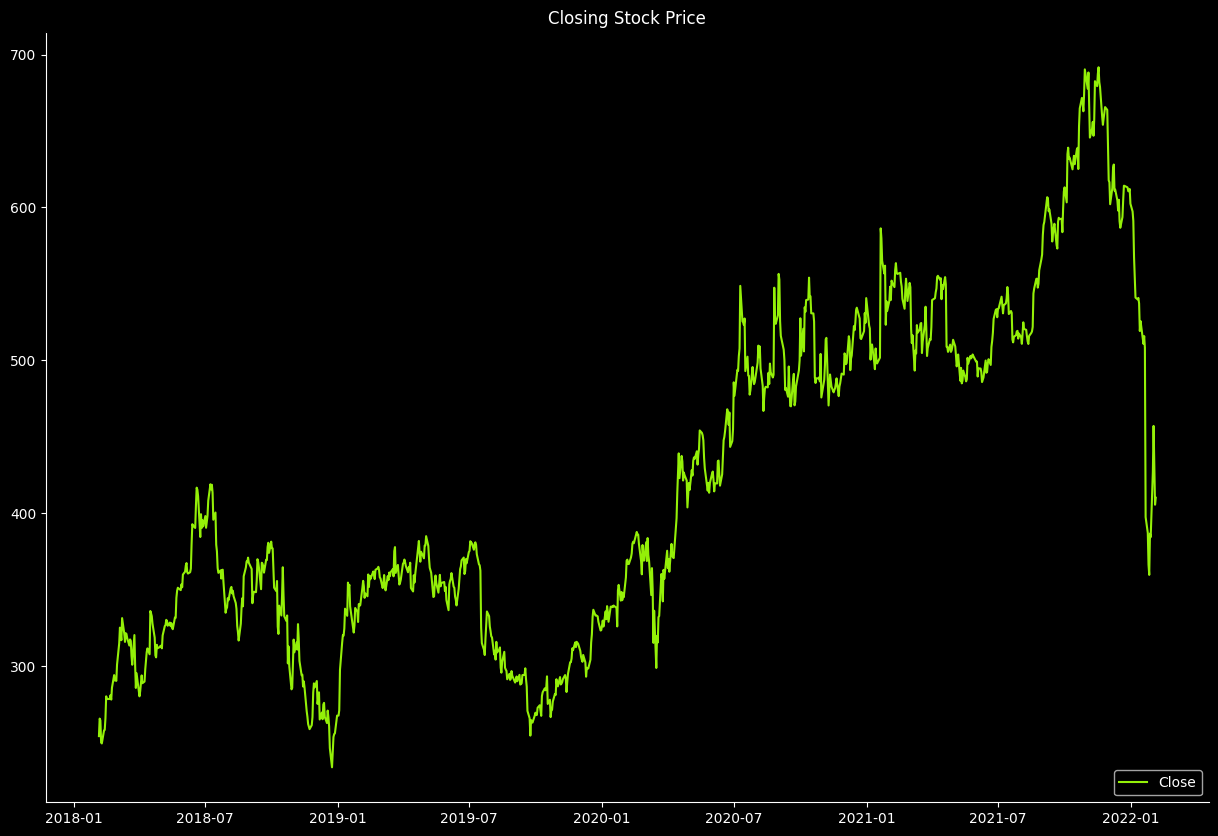

In [41]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

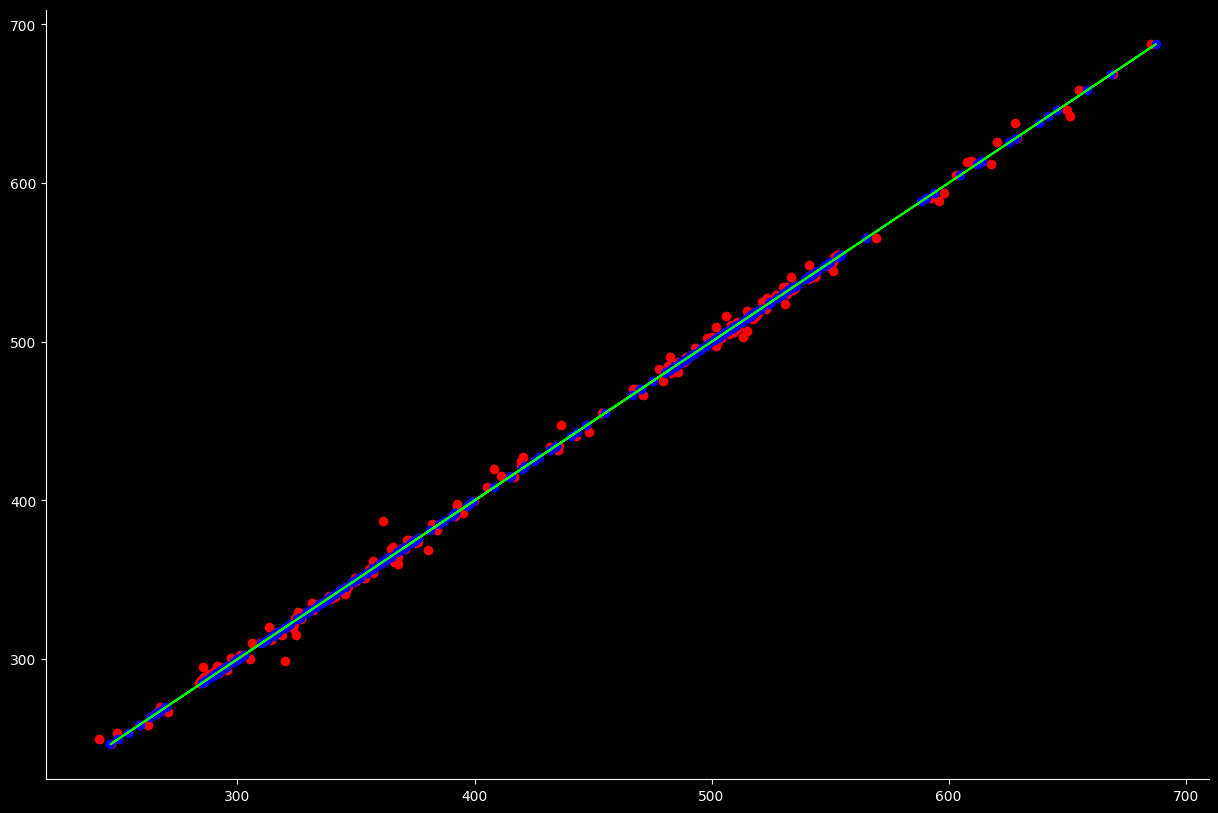

In [42]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [43]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
654,2020-09-10,503.350006,506.290009,478.839996,480.670013,480.670013,6240200,485.885546
22,2018-03-08,322.200012,322.920013,314.130005,317.000000,317.000000,11340100,316.607177
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,420.534881
980,2021-12-27,615.000000,615.000000,609.250000,613.119995,613.119995,2061500,610.303900
962,2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900,651.100313
...,...,...,...,...,...,...,...,...
699,2020-11-12,491.000000,496.519989,480.429993,486.769989,486.769989,5063700,487.004550
729,2020-12-28,516.429993,523.659973,507.130005,519.119995,519.119995,2891900,514.785438
164,2018-09-28,379.239990,380.799988,373.730011,374.130005,374.130005,7114900,376.264549
866,2021-07-15,553.969971,557.539978,538.200012,542.950012,542.950012,5713900,544.131355


In [44]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,427.104257,106.99489,246.389999,338.289993,411.509995,516.272507,687.400024
Close_Prediction,202.0,426.872275,107.03524,241.560192,338.858082,406.828394,515.407692,685.356159


Pediction Adjusted Close with ARIMA

In [46]:
df = pd.read_csv("./NFLX.csv")


In [47]:
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)


In [48]:
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3263265715.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




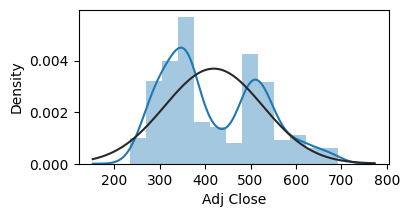

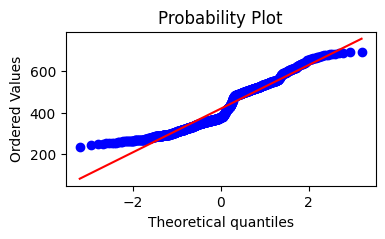

In [51]:
from scipy.stats import norm, skew 
from scipy import stats 
import statsmodels.api as sm 
import seaborn as sb
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['Adj Close'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Adj Close'], plot=plt)
plt.show()

In [52]:
df = df.groupby('Date')['Adj Close'].sum().reset_index()

In [53]:
df.Date=pd.to_datetime(df.Date)
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [54]:
df.set_index(['Date'],inplace=True)
df.head()

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


Plotting the data:

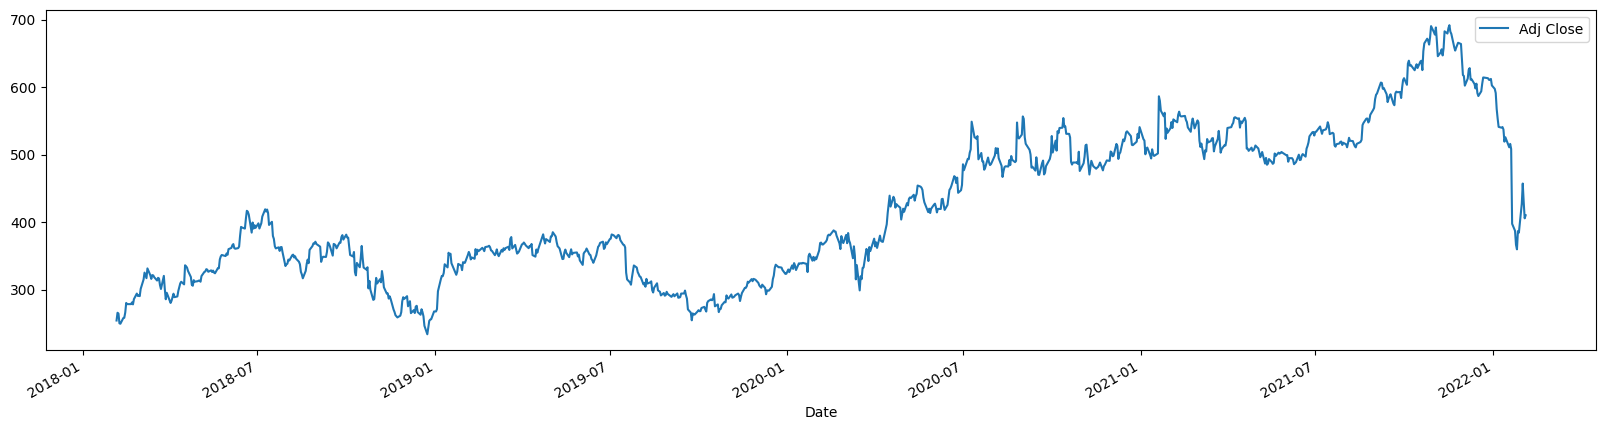

In [55]:
df.plot(figsize=(20,5))
plt.show()

Checking for stationarity using Augmented Dickey Fuller Test

In [56]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        
adfuller_test(df['Adj Close'])

ADF Test Statistic: -1.8125906878289957
p-value: 0.3742289256820758
#Lags Used: 6
#Observation Used: 1002
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


Differencing the data to make it stationary:

ADF Test Statistic: -14.242275992929107
p-value: 1.5304022754298954e-26
#Lags Used: 5
#Observation Used: 1002
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<AxesSubplot: xlabel='Date'>

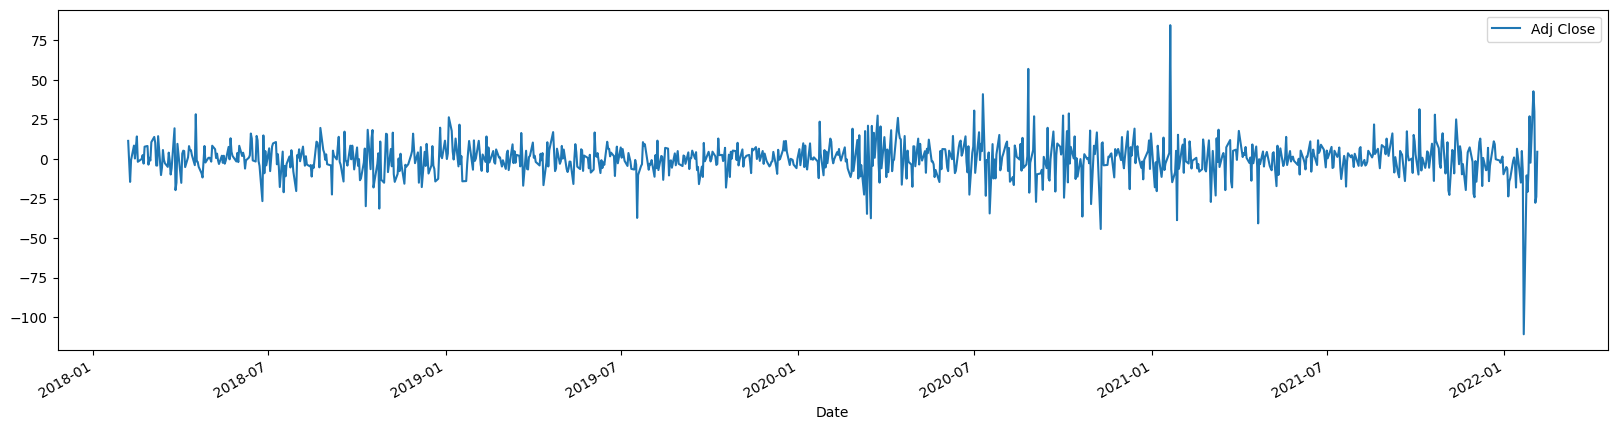

In [57]:
diff1=df-df.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

Plotting Autocorrelation and Partial Autocorreltion functions to find the number of lags:

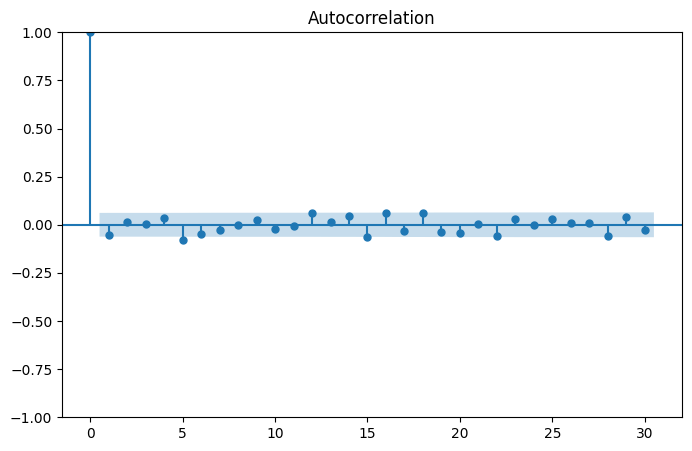

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(diff1['Adj Close'], ax=ax, lags=30)
plt.show()

Finding the most optimal values of p and q:

In [65]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(df['Adj Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

AIC :7719.252725388626, Order Of AR: 1, Order of MA:1 
AIC :7720.890983923267, Order Of AR: 1, Order of MA:2 
AIC :7722.748629700624, Order Of AR: 1, Order of MA:3 
AIC :7723.685761892478, Order Of AR: 1, Order of MA:4 
AIC :7718.415482131926, Order Of AR: 1, Order of MA:5 
AIC :7718.172317923015, Order Of AR: 1, Order of MA:6 
AIC :7719.876850432056, Order Of AR: 2, Order of MA:1 
AIC :7723.251351789819, Order Of AR: 2, Order of MA:2 
AIC :7724.674017306024, Order Of AR: 2, Order of MA:3 
AIC :7723.762865569372, Order Of AR: 2, Order of MA:4 
AIC :7718.287566398045, Order Of AR: 2, Order of MA:5 
AIC :7720.069487585884, Order Of AR: 2, Order of MA:6 
AIC :7721.431345031125, Order Of AR: 3, Order of MA:1 
AIC :7714.6534769855025, Order Of AR: 3, Order of MA:2 
AIC :7725.176499994605, Order Of AR: 3, Order of MA:3 
AIC :7720.604316630749, Order Of AR: 3, Order of MA:4 
AIC :7719.97065833423, Order Of AR: 3, Order of MA:5 
AIC :7722.088940696482, Order Of AR: 3, Order of MA:6 
AIC :7723.

Building ARIMA Model:

In [66]:
model=ARIMA(df['Adj Close'],order=(6,1,6))
result=model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.362
Date:                Mon, 31 Jul 2023   AIC                           7702.724
Time:                        03:15:21   BIC                           7766.628
Sample:                             0   HQIC                          7727.003
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.065      3.454      0.001       0.096       0.349
ar.L2          0.6266      0.062     10.143      0.000       0.506       0.748
ar.L3         -1.1331      0.068    -16.551      0.000      -1.267      -0.999
ar.L4          0.5394      0.062      8.680      0.000       0.418       0.661
ar.L5          0.2457      0.056      4.357      0.000       0.135       0.356
ar.L6         -0.8752      0.065    -13.556      0.000      -1.002      -0.749
ma.L1         -0.2627      0.074     -3.547      0.000      -0.408      -0.118
ma.L2         -0.5881      0.068     -8.680      0.000      -0.721      -0.455
ma.L3          1.1599      0.070     16.472      0.000       1.022       1.298
ma.L4         -0.5770      0.065     -8.902      0.000      -0.704      -0.450
ma.L5         -0.2656      0.065     -4.067      0.000      -0.394      -0.138
ma.L6          0.8401      0.073     11.544      0.000       0.697       0.983
sigma2       120.4536      2.384     50.535      0.000     115.782     125.125
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9327.88
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plotting the ARIMA prediction result:

<AxesSubplot: xlabel='Date'>

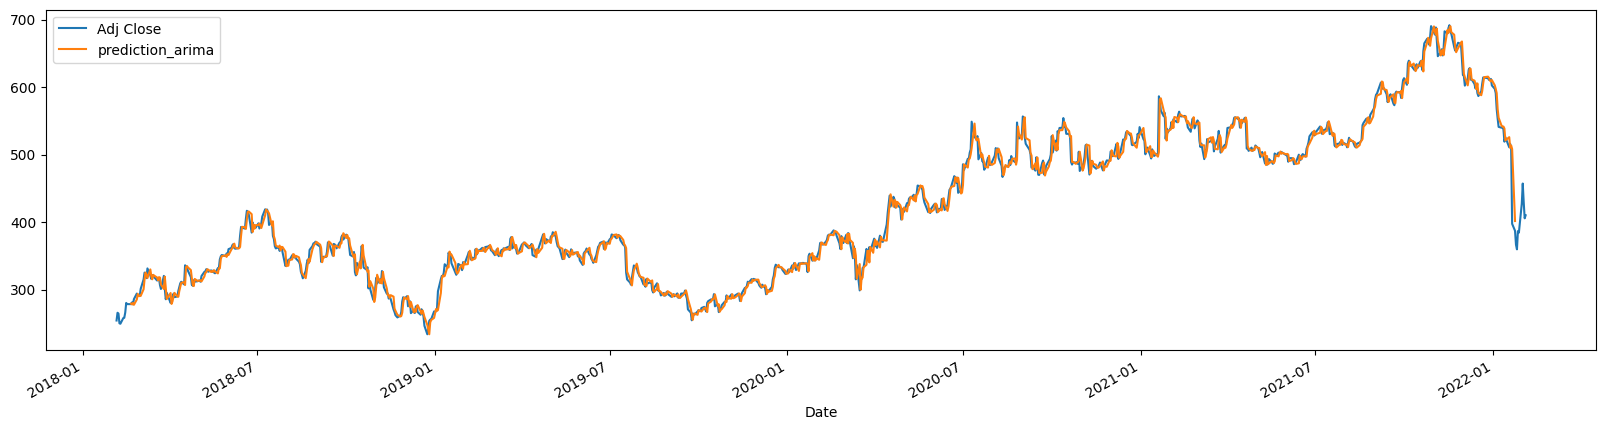

In [67]:
df['prediction_arima']=result.predict(start=10,end=999)
df[["Adj Close","prediction_arima"]].plot(figsize=(20,5))

Forecasting Stock Price for the next 30 days:

In [68]:
fc = result.forecast(30, alpha=0.05)
for i in fc:
    print(round(i,0))

409.0
400.0
393.0
392.0
396.0
398.0
398.0
400.0
406.0
411.0
412.0
407.0
404.0
403.0
402.0
398.0
394.0
395.0
399.0
403.0
404.0
405.0
407.0
409.0
408.0
404.0
400.0
399.0
399.0
399.0


In [69]:
fc = [408.0, 408.0, 407.0, 405.0, 411.0, 409.0, 410.0, 407.0, 407.0, 410.0, 409.0, 411.0, 407.0, 408.0, 409.0, 409.0, 410.0, 407.0, 409.0, 409.0, 410.0, 410.0, 408.0, 409.0, 408.0, 410.0, 409.0, 408.0, 409.0, 409.0]

start_date = '2022-02-05'
end_date = '2022-03-06'
date_range = pd.date_range(start=start_date, end=end_date)


fc_with_dates = pd.Series(fc, index=date_range)
print(fc_with_dates)

2022-02-05    408.0
2022-02-06    408.0
2022-02-07    407.0
2022-02-08    405.0
2022-02-09    411.0
2022-02-10    409.0
2022-02-11    410.0
2022-02-12    407.0
2022-02-13    407.0
2022-02-14    410.0
2022-02-15    409.0
2022-02-16    411.0
2022-02-17    407.0
2022-02-18    408.0
2022-02-19    409.0
2022-02-20    409.0
2022-02-21    410.0
2022-02-22    407.0
2022-02-23    409.0
2022-02-24    409.0
2022-02-25    410.0
2022-02-26    410.0
2022-02-27    408.0
2022-02-28    409.0
2022-03-01    408.0
2022-03-02    410.0
2022-03-03    409.0
2022-03-04    408.0
2022-03-05    409.0
2022-03-06    409.0
Freq: D, dtype: float64


Plotting the forecasted stock prices:

<AxesSubplot: >

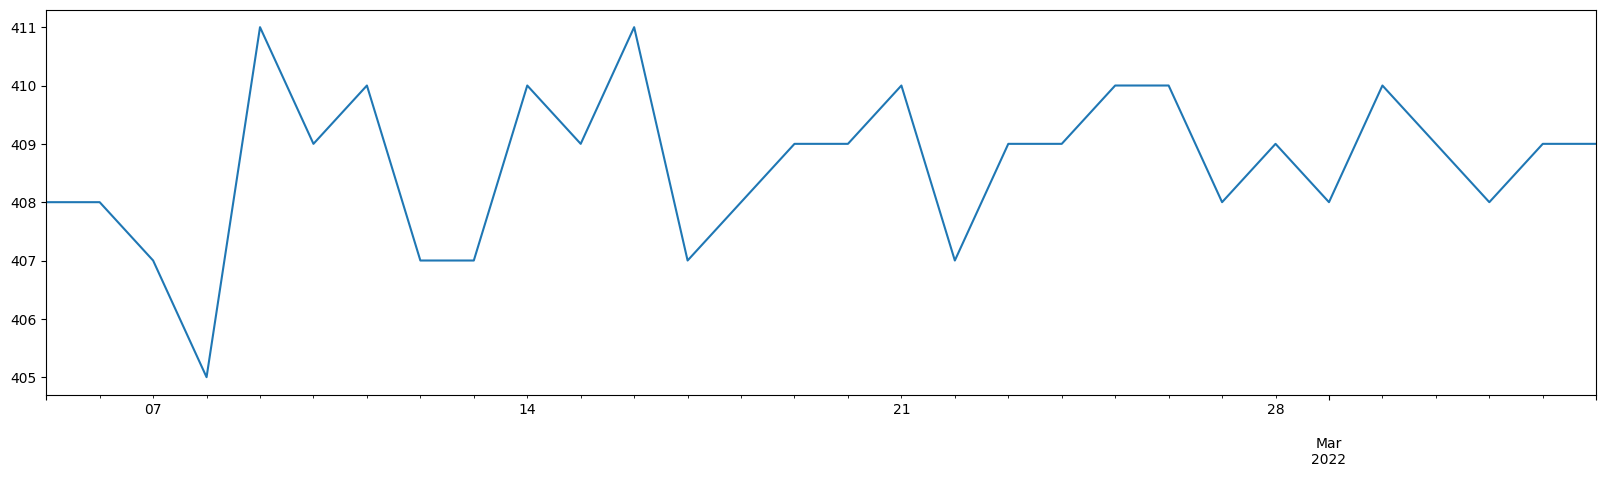

In [70]:
fc_with_dates.plot(figsize=(20,5))

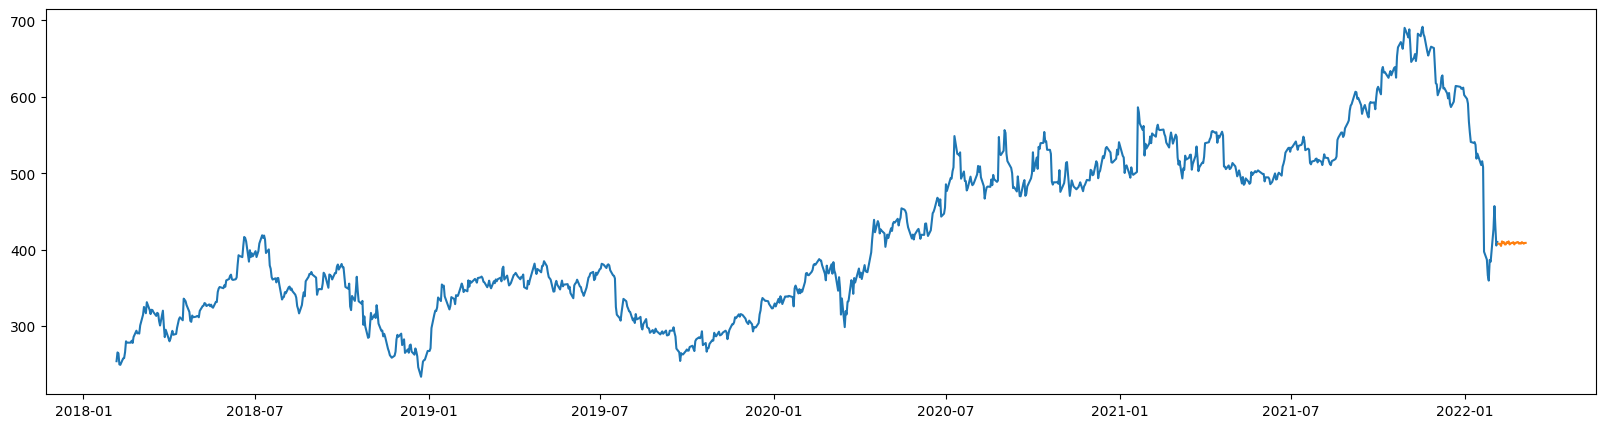

In [71]:
plt.figure(figsize=(20,5))
plt.plot(df["Adj Close"])
plt.plot(fc_with_dates)

Recurrent Neural Network (RNN) 

In [72]:
dataRNN = pd.read_csv("./NFLX.csv")
dataRNN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [73]:
train_dfRNN=data[:900]
test_dfRNN=data[900:]

In [75]:
trainRnn=train_dfRNN.loc[:,["Open"]].values

In [76]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(trainRnn)

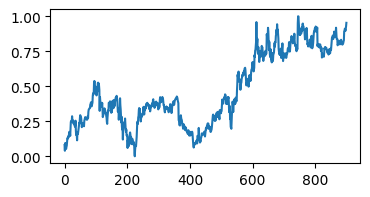

In [77]:
plt.plot(train_scaled)
plt.show()

In [78]:
len(train_scaled)

900

In [79]:
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [80]:
len(X_train)

850

In [81]:
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [82]:
y_train[0]

0.2937479869380776

Modeling

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [86]:
regressor=Sequential()

regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))
              
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))
              
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0,2))
              
regressor.add(Dense(units=1))
regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
27/27 [==============================] - 4s 24ms/step - loss: 0.0365
Epoch 2/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0041
Epoch 3/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0028
Epoch 4/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0023
Epoch 5/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0023
Epoch 6/10
27/27 [==============================] - 1s 24ms/step - loss: 0.0022
Epoch 7/10
27/27 [==============================] - 1s 24ms/step - loss: 0.0019
Epoch 8/10
27/27 [==============================] - 1s 24ms/step - loss: 0.0017
Epoch 9/10
27/27 [==============================] - 1s 25ms/step - loss: 0.0018
Epoch 10/10
27/27 [==============================] - 1s 24ms/step - loss: 0.0017


Predictions and Visualising RNN Model

In [88]:
real_stock_price=test_dfRNN.loc[:,["Open"]].values

In [89]:
dataset_total=pd.concat((train_dfRNN["Open"],test_dfRNN["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_dfRNN)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [91]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_dfRNN)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

4/4 [==============================] - 1s 10ms/step


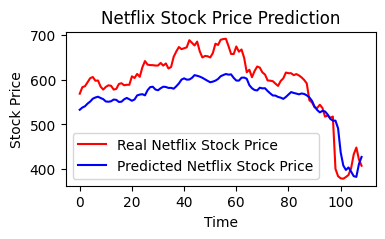

In [92]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

Long Short Term Memory (LSTM)

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Modeling

In [95]:
dataLSTM = pd.read_csv("./NFLX.csv")
dataLSTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [96]:
train_dfLSTM=data[:900]
test_dfLSTM=data[900:]

In [97]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 8s 59ms/step - loss: 0.0580
Epoch 2/10
27/27 [==============================] - 2s 57ms/step - loss: 0.0129
Epoch 3/10
27/27 [==============================] - 2s 57ms/step - loss: 0.0101
Epoch 4/10
27/27 [==============================] - 2s 57ms/step - loss: 0.0097
Epoch 5/10
27/27 [==============================] - 2s 58ms/step - loss: 0.0108
Epoch 6/10
27/27 [==============================] - 2s 60ms/step - loss: 0.0096
Epoch 7/10
27/27 [==============================] - 2s 58ms/step - loss: 0.0088
Epoch 8/10
27/27 [==============================] - 2s 60ms/step - loss: 0.0097
Epoch 9/10
27/27 [==============================] - 2s 58ms/step - loss: 0.0082
Epoch 10/10
27/27 [==============================] - 2s 58ms/step - loss: 0.0084


In [100]:
dataset_total=pd.concat((train_dfLSTM["Open"],test_dfLSTM["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_dfLSTM)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [102]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_dfLSTM)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

4/4 [==============================] - 1s 25ms/step


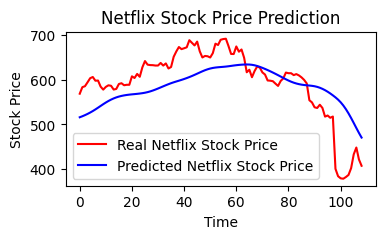

In [103]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()